<a href="https://colab.research.google.com/github/Jeder14/TelecomX_challenge_parte2/blob/main/TelecomX_parte2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [736]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, RobustScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve, precision_score, recall_score, f1_score
from imblearn.over_sampling import SMOTE


In [737]:
url = 'https://raw.githubusercontent.com/Jeder14/TelecomX_challenge_parte2/refs/heads/main/Data/datos_limpios.csv'
df = pd.read_csv(url)
df.sample(10)

,customerid,churn,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,...,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,charges_monthly,charges_total,cuentas_diarias
163,0259-GBZSH,1.0,Male,0,0,0,2,1,Yes,Fiber optic,...,No,No,Yes,No,Month-to-month,1,Electronic check,85.65,181.50,2.82
3369,4680-KUTAJ,0.0,Female,1,0,0,11,1,Yes,DSL,...,No,No,No,No,Month-to-month,1,Electronic check,55.60,580.80,1.83
3851,5275-PMFUT,0.0,Male,0,1,1,72,0,No phone service,DSL,...,Yes,Yes,Yes,Yes,Two year,1,Credit card (automatic),64.80,4719.75,2.13
3283,4578-PHJYZ,0.0,Male,0,1,1,52,1,No,DSL,...,Yes,Yes,Yes,No,One year,1,Electronic check,68.75,3482.85,2.26
517,0731-EBJQB,0.0,Female,0,1,1,52,1,No,No,...,No internet service,No internet service,No internet service,No internet service,One year,1,Electronic check,20.40,1090.65,0.67
3608,4973-RLZVI,0.0,Female,0,0,0,30,1,No,DSL,...,Yes,Yes,Yes,No,One year,0,Credit card (automatic),74.65,2308.60,2.46
6036,8237-ULIXL,0.0,Female,0,1,0,72,1,Yes,No,...,No internet service,No internet service,No internet service,No internet service,Two year,0,Credit card (automatic),24.85,1871.85,0.82
3743,5149-TGWDZ,0.0,Female,0,0,0,21,1,No,Fiber optic,...,Yes,Yes,Yes,Yes,One year,1,Mailed check,104.55,2239.40,3.44
2624,3657-COGMW,0.0,Female,1,0,0,52,1,Yes,Fiber optic,...,Yes,No,Yes,Yes,Month-to-month,0,Credit card (automatic),108.10,5839.30,3.56
524,0742-NXBGR,1.0,Female,0,0,0,1,1,No,Fiber optic,...,Yes,No,No,No,Month-to-month,1,Electronic check,82.30,82.30,2.71


In [738]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerid        7267 non-null   object 
 1   churn             7043 non-null   float64
 2   gender            7267 non-null   object 
 3   seniorcitizen     7267 non-null   int64  
 4   partner           7267 non-null   int64  
 5   dependents        7267 non-null   int64  
 6   tenure            7267 non-null   int64  
 7   phoneservice      7267 non-null   int64  
 8   multiplelines     7267 non-null   object 
 9   internetservice   7267 non-null   object 
 10  onlinesecurity    7267 non-null   object 
 11  onlinebackup      7267 non-null   object 
 12  deviceprotection  7267 non-null   object 
 13  techsupport       7267 non-null   object 
 14  streamingtv       7267 non-null   object 
 15  streamingmovies   7267 non-null   object 
 16  contract          7267 non-null   object 


In [739]:
df.columns

Index(['customerid', 'churn', 'gender', 'seniorcitizen', 'partner',
       'dependents', 'tenure', 'phoneservice', 'multiplelines',
       'internetservice', 'onlinesecurity', 'onlinebackup', 'deviceprotection',
       'techsupport', 'streamingtv', 'streamingmovies', 'contract',
       'paperlessbilling', 'paymentmethod', 'charges_monthly', 'charges_total',
       'cuentas_diarias'],
      dtype='object')

## Cambio de nombre de las columnas

In [740]:
df.rename(columns = {
    'customerid':'identificacion','churn':'evasion', 'gender':'genero', 'seniorcitizen':'adulto_mayor', 'partner':'tiene_pareja', 'dependents':'tiene_dependientes', 'tenure':'contrato_cliente',
       'phoneservice':'servicio_telefonico', 'multiplelines':'linea_telefonica', 'internetservice':'proovedor_internet', 'onlinesecurity':'seguridad_en_linea',
       'onlinebackup':'respaldo_en_linea', 'deviceprotection':'proteccion_dispositivo', 'techsupport':'soporte_tecnico', 'streamingtv':'streaming_tv',
       'streamingmovies':'streaming_peliculas', 'contract':'tipo_contrato', 'paperlessbilling':'facturacion_electronica', 'paymentmethod':'metodo_pago',
       'charges_monthly':'cargo_mensual', 'charges_total':'cargo_total', 'cuentas_diarias':'cuentas_diarias'
},inplace=True)

df.sample(10)

,identificacion,evasion,genero,adulto_mayor,tiene_pareja,tiene_dependientes,contrato_cliente,servicio_telefonico,linea_telefonica,proovedor_internet,...,proteccion_dispositivo,soporte_tecnico,streaming_tv,streaming_peliculas,tipo_contrato,facturacion_electronica,metodo_pago,cargo_mensual,cargo_total,cuentas_diarias
3023,4195-NZGTA,0.0,Female,0,0,0,1,0,No phone service,DSL,...,No,No,No,No,Month-to-month,0,Electronic check,25.25,25.25,0.83
2245,3134-JCVOE,NaN,Female,0,0,0,3,0,No phone service,DSL,...,No,No,No,No,Month-to-month,0,Mailed check,29.20,98.50,0.96
254,0376-YMCJC,1.0,Male,0,0,0,23,1,Yes,Fiber optic,...,No,Yes,Yes,No,Month-to-month,1,Electronic check,90.60,1943.20,2.98
3896,5327-CNLUQ,0.0,Male,0,1,0,48,1,Yes,Fiber optic,...,Yes,No,Yes,No,Two year,1,Bank transfer (automatic),96.90,4473.45,3.19
4188,5751-USDBL,0.0,Male,0,1,1,46,1,No,DSL,...,Yes,Yes,Yes,Yes,Two year,0,Mailed check,81.00,3846.35,2.66
2592,3620-EHIMZ,0.0,Female,0,1,1,52,1,No,No,...,No internet service,No internet service,No internet service,No internet service,Two year,0,Mailed check,19.35,1031.70,0.64
6349,8735-DCXNF,0.0,Male,0,1,0,10,1,No,DSL,...,No,Yes,No,No,Month-to-month,1,Credit card (automatic),54.95,568.85,1.81
4575,6266-QHOJZ,0.0,Female,0,0,0,65,1,Yes,Fiber optic,...,No,Yes,No,No,One year,1,Electronic check,89.85,5844.65,2.96
3487,4819-HJPIW,0.0,Male,0,0,0,18,0,No phone service,DSL,...,No,No,No,No,Month-to-month,0,Mailed check,25.15,476.80,0.83
3274,4566-NECEV,0.0,Male,0,0,0,5,1,Yes,Fiber optic,...,Yes,No,No,Yes,Month-to-month,0,Electronic check,96.55,500.10,3.18


## Eliminacion de columnas irrelevantes

In [741]:
# Se eliminan las columnas con identificadores unicos: customerid
df = df.drop(['identificacion'],axis=1)
df.sample(10)

,evasion,genero,adulto_mayor,tiene_pareja,tiene_dependientes,contrato_cliente,servicio_telefonico,linea_telefonica,proovedor_internet,seguridad_en_linea,...,proteccion_dispositivo,soporte_tecnico,streaming_tv,streaming_peliculas,tipo_contrato,facturacion_electronica,metodo_pago,cargo_mensual,cargo_total,cuentas_diarias
3982,1.0,Male,0,0,0,62,1,Yes,Fiber optic,Yes,...,No,Yes,No,Yes,One year,0,Electronic check,102.00,6529.25,3.36
4335,0.0,Male,0,0,0,18,1,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,0,Bank transfer (automatic),84.30,1537.90,2.77
3377,0.0,Female,1,1,0,42,1,Yes,Fiber optic,No,...,Yes,No,Yes,No,Month-to-month,1,Electronic check,95.55,3930.60,3.14
5305,0.0,Female,0,0,0,51,1,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,One year,1,Electronic check,111.50,5703.25,3.67
5137,0.0,Female,0,1,0,71,1,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,1,Credit card (automatic),24.25,1732.95,0.80
4574,0.0,Male,0,1,1,69,1,Yes,Fiber optic,No,...,Yes,No,Yes,No,One year,0,Credit card (automatic),95.75,6511.25,3.15
982,1.0,Female,0,0,0,7,1,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,0,Mailed check,20.05,164.85,0.66
2673,0.0,Male,0,1,0,38,1,Yes,Fiber optic,Yes,...,No,No,Yes,No,Month-to-month,0,Bank transfer (automatic),91.70,3479.05,3.02
3685,0.0,Male,0,0,0,51,1,Yes,Fiber optic,No,...,No,No,No,Yes,Month-to-month,0,Bank transfer (automatic),83.40,4149.45,2.74
4671,1.0,Female,0,0,0,48,1,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,1,Bank transfer (automatic),107.40,5121.30,3.53


In [742]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   evasion                  7043 non-null   float64
 1   genero                   7267 non-null   object 
 2   adulto_mayor             7267 non-null   int64  
 3   tiene_pareja             7267 non-null   int64  
 4   tiene_dependientes       7267 non-null   int64  
 5   contrato_cliente         7267 non-null   int64  
 6   servicio_telefonico      7267 non-null   int64  
 7   linea_telefonica         7267 non-null   object 
 8   proovedor_internet       7267 non-null   object 
 9   seguridad_en_linea       7267 non-null   object 
 10  respaldo_en_linea        7267 non-null   object 
 11  proteccion_dispositivo   7267 non-null   object 
 12  soporte_tecnico          7267 non-null   object 
 13  streaming_tv             7267 non-null   object 
 14  streaming_peliculas     

## Conversion de datos "No internet service" y "No phone service" como "No"

In [743]:
columnas_no = ['linea_telefonica', 'seguridad_en_linea', 'respaldo_en_linea',
               'proteccion_dispositivo', 'soporte_tecnico', 'streaming_tv', 'streaming_peliculas']

for col in columnas_no:
    df[col] = df[col].replace(['No internet service', 'No phone service'], 'No')


In [744]:
df.sample(10)

,evasion,genero,adulto_mayor,tiene_pareja,tiene_dependientes,contrato_cliente,servicio_telefonico,linea_telefonica,proovedor_internet,seguridad_en_linea,...,proteccion_dispositivo,soporte_tecnico,streaming_tv,streaming_peliculas,tipo_contrato,facturacion_electronica,metodo_pago,cargo_mensual,cargo_total,cuentas_diarias
686,0.0,Female,0,1,0,69,1,Yes,No,No,...,No,No,No,No,Two year,0,Bank transfer (automatic),24.25,1641.80,0.80
4553,0.0,Male,0,1,0,66,1,Yes,Fiber optic,Yes,...,Yes,Yes,No,No,Two year,0,Mailed check,96.60,6424.25,3.18
2910,1.0,Male,1,1,0,36,1,Yes,Fiber optic,No,...,No,No,Yes,Yes,Month-to-month,1,Electronic check,96.50,3436.10,3.17
5365,0.0,Male,1,1,0,72,1,Yes,Fiber optic,Yes,...,Yes,Yes,No,No,Two year,1,Bank transfer (automatic),93.05,6735.05,3.06
3640,0.0,Female,0,0,0,10,1,Yes,No,No,...,No,No,No,No,Month-to-month,1,Mailed check,24.50,270.15,0.81
7221,0.0,Female,0,1,0,46,1,Yes,DSL,Yes,...,No,No,No,No,Month-to-month,0,Bank transfer (automatic),55.00,2473.95,1.81
2357,0.0,Female,0,1,0,45,1,Yes,No,No,...,No,No,No,No,Two year,0,Mailed check,25.50,1121.05,0.84
1896,0.0,Female,1,0,0,22,1,No,No,No,...,No,No,No,No,One year,1,Mailed check,20.05,417.00,0.66
2131,0.0,Female,0,0,0,70,1,Yes,DSL,Yes,...,Yes,No,Yes,Yes,Two year,0,Mailed check,84.70,5991.05,2.79
5324,0.0,Female,0,1,0,55,1,Yes,Fiber optic,No,...,Yes,No,Yes,No,Month-to-month,1,Credit card (automatic),94.45,5073.10,3.11


In [745]:
#convertir a valores binarios
columnas_no = ['linea_telefonica', 'seguridad_en_linea', 'respaldo_en_linea',
               'proteccion_dispositivo', 'soporte_tecnico', 'streaming_tv', 'streaming_peliculas']

for col in columnas_no:
  df[col]=df[col].map({'No':0,'Yes':1})

In [746]:
for col in columnas_no:
  print(col, df[col].unique())

linea_telefonica [0 1]
seguridad_en_linea [0 1]
respaldo_en_linea [1 0]
proteccion_dispositivo [0 1]
soporte_tecnico [1 0]
streaming_tv [1 0]
streaming_peliculas [0 1]


In [747]:
df.sample(10)

,evasion,genero,adulto_mayor,tiene_pareja,tiene_dependientes,contrato_cliente,servicio_telefonico,linea_telefonica,proovedor_internet,seguridad_en_linea,...,proteccion_dispositivo,soporte_tecnico,streaming_tv,streaming_peliculas,tipo_contrato,facturacion_electronica,metodo_pago,cargo_mensual,cargo_total,cuentas_diarias
3834,0.0,Male,0,0,0,54,1,1,Fiber optic,0,...,0,0,0,0,Month-to-month,1,Bank transfer (automatic),79.85,4308.25,2.63
2793,1.0,Male,1,0,0,1,1,0,Fiber optic,0,...,0,0,0,0,Month-to-month,0,Electronic check,69.10,69.10,2.27
1735,0.0,Male,0,1,1,8,1,0,No,0,...,0,0,0,0,Month-to-month,0,Credit card (automatic),19.65,169.75,0.65
2552,0.0,Female,0,1,1,64,0,0,DSL,0,...,1,1,0,1,Two year,0,Electronic check,49.85,3210.35,1.64
3341,0.0,Female,0,1,0,18,1,0,Fiber optic,0,...,1,0,1,1,Month-to-month,1,Credit card (automatic),95.95,1745.50,3.16
1001,0.0,Female,0,1,1,18,1,0,DSL,1,...,0,1,0,0,One year,1,Mailed check,61.50,1087.45,2.02
156,0.0,Female,0,0,0,72,1,0,Fiber optic,1,...,1,1,1,1,Two year,1,Electronic check,109.90,7624.20,3.62
4379,0.0,Female,0,1,0,61,1,1,Fiber optic,0,...,0,1,0,1,Two year,1,Bank transfer (automatic),94.35,5703.00,3.10
896,0.0,Female,0,1,0,49,0,0,DSL,0,...,0,1,1,1,One year,1,Credit card (automatic),56.30,2780.60,1.85
5065,0.0,Female,0,0,0,5,1,0,Fiber optic,0,...,0,0,1,0,Month-to-month,0,Electronic check,80.20,384.25,2.64


In [748]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   evasion                  7043 non-null   float64
 1   genero                   7267 non-null   object 
 2   adulto_mayor             7267 non-null   int64  
 3   tiene_pareja             7267 non-null   int64  
 4   tiene_dependientes       7267 non-null   int64  
 5   contrato_cliente         7267 non-null   int64  
 6   servicio_telefonico      7267 non-null   int64  
 7   linea_telefonica         7267 non-null   int64  
 8   proovedor_internet       7267 non-null   object 
 9   seguridad_en_linea       7267 non-null   int64  
 10  respaldo_en_linea        7267 non-null   int64  
 11  proteccion_dispositivo   7267 non-null   int64  
 12  soporte_tecnico          7267 non-null   int64  
 13  streaming_tv             7267 non-null   int64  
 14  streaming_peliculas     

In [749]:
#Convertimos yes y no en 1 y 0 solo para churn, ya que tambien tiene valores vacios
df['evasion'].unique()

array([ 0.,  1., nan])

In [750]:
df.sample(5)

,evasion,genero,adulto_mayor,tiene_pareja,tiene_dependientes,contrato_cliente,servicio_telefonico,linea_telefonica,proovedor_internet,seguridad_en_linea,...,proteccion_dispositivo,soporte_tecnico,streaming_tv,streaming_peliculas,tipo_contrato,facturacion_electronica,metodo_pago,cargo_mensual,cargo_total,cuentas_diarias
550,0.0,Male,0,0,1,72,1,0,No,0,...,0,0,0,0,Two year,0,Credit card (automatic),19.90,1529.65,0.65
2729,0.0,Female,0,1,0,24,1,0,No,0,...,0,0,0,0,One year,0,Mailed check,20.15,456.85,0.66
3317,0.0,Male,0,0,0,44,1,0,No,0,...,0,0,0,0,Two year,0,Credit card (automatic),20.40,905.55,0.67
5920,0.0,Female,0,0,0,11,1,0,No,0,...,0,0,0,0,One year,0,Mailed check,20.00,211.95,0.66
5574,0.0,Female,0,1,0,42,1,1,Fiber optic,0,...,1,1,0,0,Month-to-month,1,Credit card (automatic),85.90,3729.75,2.83


In [751]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   evasion                  7043 non-null   float64
 1   genero                   7267 non-null   object 
 2   adulto_mayor             7267 non-null   int64  
 3   tiene_pareja             7267 non-null   int64  
 4   tiene_dependientes       7267 non-null   int64  
 5   contrato_cliente         7267 non-null   int64  
 6   servicio_telefonico      7267 non-null   int64  
 7   linea_telefonica         7267 non-null   int64  
 8   proovedor_internet       7267 non-null   object 
 9   seguridad_en_linea       7267 non-null   int64  
 10  respaldo_en_linea        7267 non-null   int64  
 11  proteccion_dispositivo   7267 non-null   int64  
 12  soporte_tecnico          7267 non-null   int64  
 13  streaming_tv             7267 non-null   int64  
 14  streaming_peliculas     

##Label encoding

In [752]:
le = LabelEncoder()
for col in ['genero']:  # las que tengan solo 2 categorías
    df[col] = le.fit_transform(df[col])

In [753]:
df.sample(5)

,evasion,genero,adulto_mayor,tiene_pareja,tiene_dependientes,contrato_cliente,servicio_telefonico,linea_telefonica,proovedor_internet,seguridad_en_linea,...,proteccion_dispositivo,soporte_tecnico,streaming_tv,streaming_peliculas,tipo_contrato,facturacion_electronica,metodo_pago,cargo_mensual,cargo_total,cuentas_diarias
929,1.0,1,0,1,0,21,1,1,Fiber optic,0,...,1,1,1,1,Month-to-month,1,Electronic check,106.10,2249.95,3.49
2470,0.0,1,0,0,0,46,1,0,DSL,0,...,0,0,0,0,Month-to-month,1,Credit card (automatic),45.20,2065.15,1.49
3720,0.0,1,0,1,1,49,1,0,Fiber optic,0,...,1,0,1,0,Month-to-month,1,Credit card (automatic),90.40,4494.65,2.97
6603,NaN,0,0,1,1,63,1,1,Fiber optic,1,...,1,0,1,0,Month-to-month,1,Electronic check,100.55,6215.35,3.31
422,0.0,1,0,1,1,45,1,1,DSL,0,...,1,0,1,1,One year,0,Credit card (automatic),78.75,3600.65,2.59


In [754]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   evasion                  7043 non-null   float64
 1   genero                   7267 non-null   int64  
 2   adulto_mayor             7267 non-null   int64  
 3   tiene_pareja             7267 non-null   int64  
 4   tiene_dependientes       7267 non-null   int64  
 5   contrato_cliente         7267 non-null   int64  
 6   servicio_telefonico      7267 non-null   int64  
 7   linea_telefonica         7267 non-null   int64  
 8   proovedor_internet       7267 non-null   object 
 9   seguridad_en_linea       7267 non-null   int64  
 10  respaldo_en_linea        7267 non-null   int64  
 11  proteccion_dispositivo   7267 non-null   int64  
 12  soporte_tecnico          7267 non-null   int64  
 13  streaming_tv             7267 non-null   int64  
 14  streaming_peliculas     

In [755]:
df['proovedor_internet'].unique()

array(['DSL', 'Fiber optic', 'No'], dtype=object)

In [756]:
df['tipo_contrato'].unique()

array(['One year', 'Month-to-month', 'Two year'], dtype=object)

In [757]:
df['metodo_pago'].unique()

array(['Mailed check', 'Electronic check', 'Credit card (automatic)',
       'Bank transfer (automatic)'], dtype=object)

## Encoding

In [758]:
# Codificación one-hot

df_encoded = pd.get_dummies(df, columns=['proovedor_internet','tipo_contrato','metodo_pago'], drop_first=False)
df_encoded.sample(10)

,evasion,genero,adulto_mayor,tiene_pareja,tiene_dependientes,contrato_cliente,servicio_telefonico,linea_telefonica,seguridad_en_linea,respaldo_en_linea,...,proovedor_internet_DSL,proovedor_internet_Fiber optic,proovedor_internet_No,tipo_contrato_Month-to-month,tipo_contrato_One year,tipo_contrato_Two year,metodo_pago_Bank transfer (automatic),metodo_pago_Credit card (automatic),metodo_pago_Electronic check,metodo_pago_Mailed check
1154,0.0,1,1,0,0,4,0,0,0,1,...,True,False,False,True,False,False,False,True,False,False
623,1.0,0,1,1,0,27,1,0,1,0,...,False,True,False,True,False,False,False,False,True,False
2245,NaN,0,0,0,0,3,0,0,0,1,...,True,False,False,True,False,False,False,False,False,True
1822,0.0,1,0,0,1,27,1,0,0,0,...,False,False,True,False,False,True,False,True,False,False
6694,0.0,0,0,1,1,69,1,1,1,0,...,True,False,False,False,False,True,False,True,False,False
3003,0.0,1,1,0,0,67,1,1,0,0,...,False,False,True,False,False,True,False,True,False,False
2327,1.0,0,0,0,0,1,1,0,0,0,...,False,True,False,True,False,False,False,False,True,False
1171,1.0,0,0,1,1,14,1,0,0,1,...,False,True,False,True,False,False,False,True,False,False
1548,0.0,0,0,1,1,68,1,1,0,1,...,True,False,False,False,False,True,True,False,False,False
6465,0.0,1,1,0,0,20,1,0,1,0,...,True,False,False,False,True,False,False,False,False,True


In [759]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 28 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   evasion                                7043 non-null   float64
 1   genero                                 7267 non-null   int64  
 2   adulto_mayor                           7267 non-null   int64  
 3   tiene_pareja                           7267 non-null   int64  
 4   tiene_dependientes                     7267 non-null   int64  
 5   contrato_cliente                       7267 non-null   int64  
 6   servicio_telefonico                    7267 non-null   int64  
 7   linea_telefonica                       7267 non-null   int64  
 8   seguridad_en_linea                     7267 non-null   int64  
 9   respaldo_en_linea                      7267 non-null   int64  
 10  proteccion_dispositivo                 7267 non-null   int64  
 11  sopo

## Convirtiendo las columnas buleanas a numericas

In [760]:
# Detecta columnas booleanas
bool_cols = df_encoded.select_dtypes('bool').columns

# Convierte a 0/1
df_encoded[bool_cols] = df_encoded[bool_cols].astype(int)

## Escalamiento

In [761]:
#Aplicacion de StandardSacaler, cambia la escala de datos para que todas las variables numéricas tengan la misma magnitud.

scaler = StandardScaler()
df_copy=df.copy()
df_copy[['cargo_mensual','cargo_total', 'cuentas_diarias']] = scaler.fit_transform(df_copy[['cargo_mensual','cargo_total', 'cuentas_diarias']])

In [762]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 28 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   evasion                                7043 non-null   float64
 1   genero                                 7267 non-null   int64  
 2   adulto_mayor                           7267 non-null   int64  
 3   tiene_pareja                           7267 non-null   int64  
 4   tiene_dependientes                     7267 non-null   int64  
 5   contrato_cliente                       7267 non-null   int64  
 6   servicio_telefonico                    7267 non-null   int64  
 7   linea_telefonica                       7267 non-null   int64  
 8   seguridad_en_linea                     7267 non-null   int64  
 9   respaldo_en_linea                      7267 non-null   int64  
 10  proteccion_dispositivo                 7267 non-null   int64  
 11  sopo

In [763]:
df_encoded.sample(5)

,evasion,genero,adulto_mayor,tiene_pareja,tiene_dependientes,contrato_cliente,servicio_telefonico,linea_telefonica,seguridad_en_linea,respaldo_en_linea,...,proovedor_internet_DSL,proovedor_internet_Fiber optic,proovedor_internet_No,tipo_contrato_Month-to-month,tipo_contrato_One year,tipo_contrato_Two year,metodo_pago_Bank transfer (automatic),metodo_pago_Credit card (automatic),metodo_pago_Electronic check,metodo_pago_Mailed check
6739,1.0,1,0,1,1,13,1,1,0,0,...,0,1,0,1,0,0,0,1,0,0
5046,0.0,1,0,0,0,12,1,0,0,1,...,1,0,0,1,0,0,0,0,0,1
6447,0.0,1,0,0,0,48,1,0,0,0,...,0,0,1,0,1,0,1,0,0,0
3850,0.0,0,0,1,1,41,1,1,1,1,...,0,1,0,1,0,0,1,0,0,0
1135,1.0,0,0,0,0,4,1,1,0,0,...,0,1,0,1,0,0,0,0,1,0


In [764]:
df_encoded.columns

Index(['evasion', 'genero', 'adulto_mayor', 'tiene_pareja',
       'tiene_dependientes', 'contrato_cliente', 'servicio_telefonico',
       'linea_telefonica', 'seguridad_en_linea', 'respaldo_en_linea',
       'proteccion_dispositivo', 'soporte_tecnico', 'streaming_tv',
       'streaming_peliculas', 'facturacion_electronica', 'cargo_mensual',
       'cargo_total', 'cuentas_diarias', 'proovedor_internet_DSL',
       'proovedor_internet_Fiber optic', 'proovedor_internet_No',
       'tipo_contrato_Month-to-month', 'tipo_contrato_One year',
       'tipo_contrato_Two year', 'metodo_pago_Bank transfer (automatic)',
       'metodo_pago_Credit card (automatic)', 'metodo_pago_Electronic check',
       'metodo_pago_Mailed check'],
      dtype='object')

#Matriz de correlacion
####La correlación permite evaluar cómo se relacionan las variables y de qué manera sus valores varían de forma conjunta.Por su parte, la matriz de correlación ofrece una representación visual de estas relaciones para múltiples variables en un dataset, facilitando la identificación rápida de patrones y conexiones entre ellas.

In [765]:
# Contar cuántos hay de cada clase
cuentas = df['evasion'].value_counts(dropna=True)
print(cuentas)

# Calcular proporción
proporcion = df['evasion'].value_counts(normalize=True, dropna=True)
print(proporcion)

evasion
0.0    5174
1.0    1869
Name: count, dtype: int64
evasion
0.0    0.73463
1.0    0.26537
Name: proportion, dtype: float64


In [766]:
corr = df_encoded.corr()
corr.head()

,evasion,genero,adulto_mayor,tiene_pareja,tiene_dependientes,contrato_cliente,servicio_telefonico,linea_telefonica,seguridad_en_linea,respaldo_en_linea,...,proovedor_internet_DSL,proovedor_internet_Fiber optic,proovedor_internet_No,tipo_contrato_Month-to-month,tipo_contrato_One year,tipo_contrato_Two year,metodo_pago_Bank transfer (automatic),metodo_pago_Credit card (automatic),metodo_pago_Electronic check,metodo_pago_Mailed check
evasion,1.000000,-0.008612,0.150889,-0.150448,-0.164221,-0.352229,0.011942,0.040102,-0.171226,-0.082255,...,-0.124214,0.308020,-0.227890,0.405103,-0.177820,-0.302253,-0.117937,-0.134302,0.301919,-0.091683
genero,-0.008612,1.000000,-0.004288,-0.005007,0.012038,0.005765,-0.005073,-0.007805,-0.016974,-0.013494,...,0.004520,-0.009572,0.006318,-0.001312,0.007328,-0.005449,-0.018361,0.000700,0.002060,0.015057
adulto_mayor,0.150889,-0.004288,1.000000,0.022970,-0.212952,0.018187,0.010060,0.144567,-0.037953,0.068824,...,-0.108192,0.255271,-0.182697,0.136871,-0.046832,-0.114837,-0.015747,-0.022698,0.170705,-0.154216
tiene_pareja,-0.150448,-0.005007,0.022970,1.000000,0.448900,0.377551,0.018828,0.141187,0.141392,0.139523,...,-0.003166,0.002678,0.000419,-0.277828,0.081021,0.246472,0.109090,0.081613,-0.079629,-0.097648
tiene_dependientes,-0.164221,0.012038,-0.212952,0.448900,1.000000,0.159892,-0.003863,-0.027894,0.083951,0.023686,...,0.052072,-0.168028,0.142274,-0.230598,0.068755,0.203136,0.050923,0.061608,-0.151749,0.060222


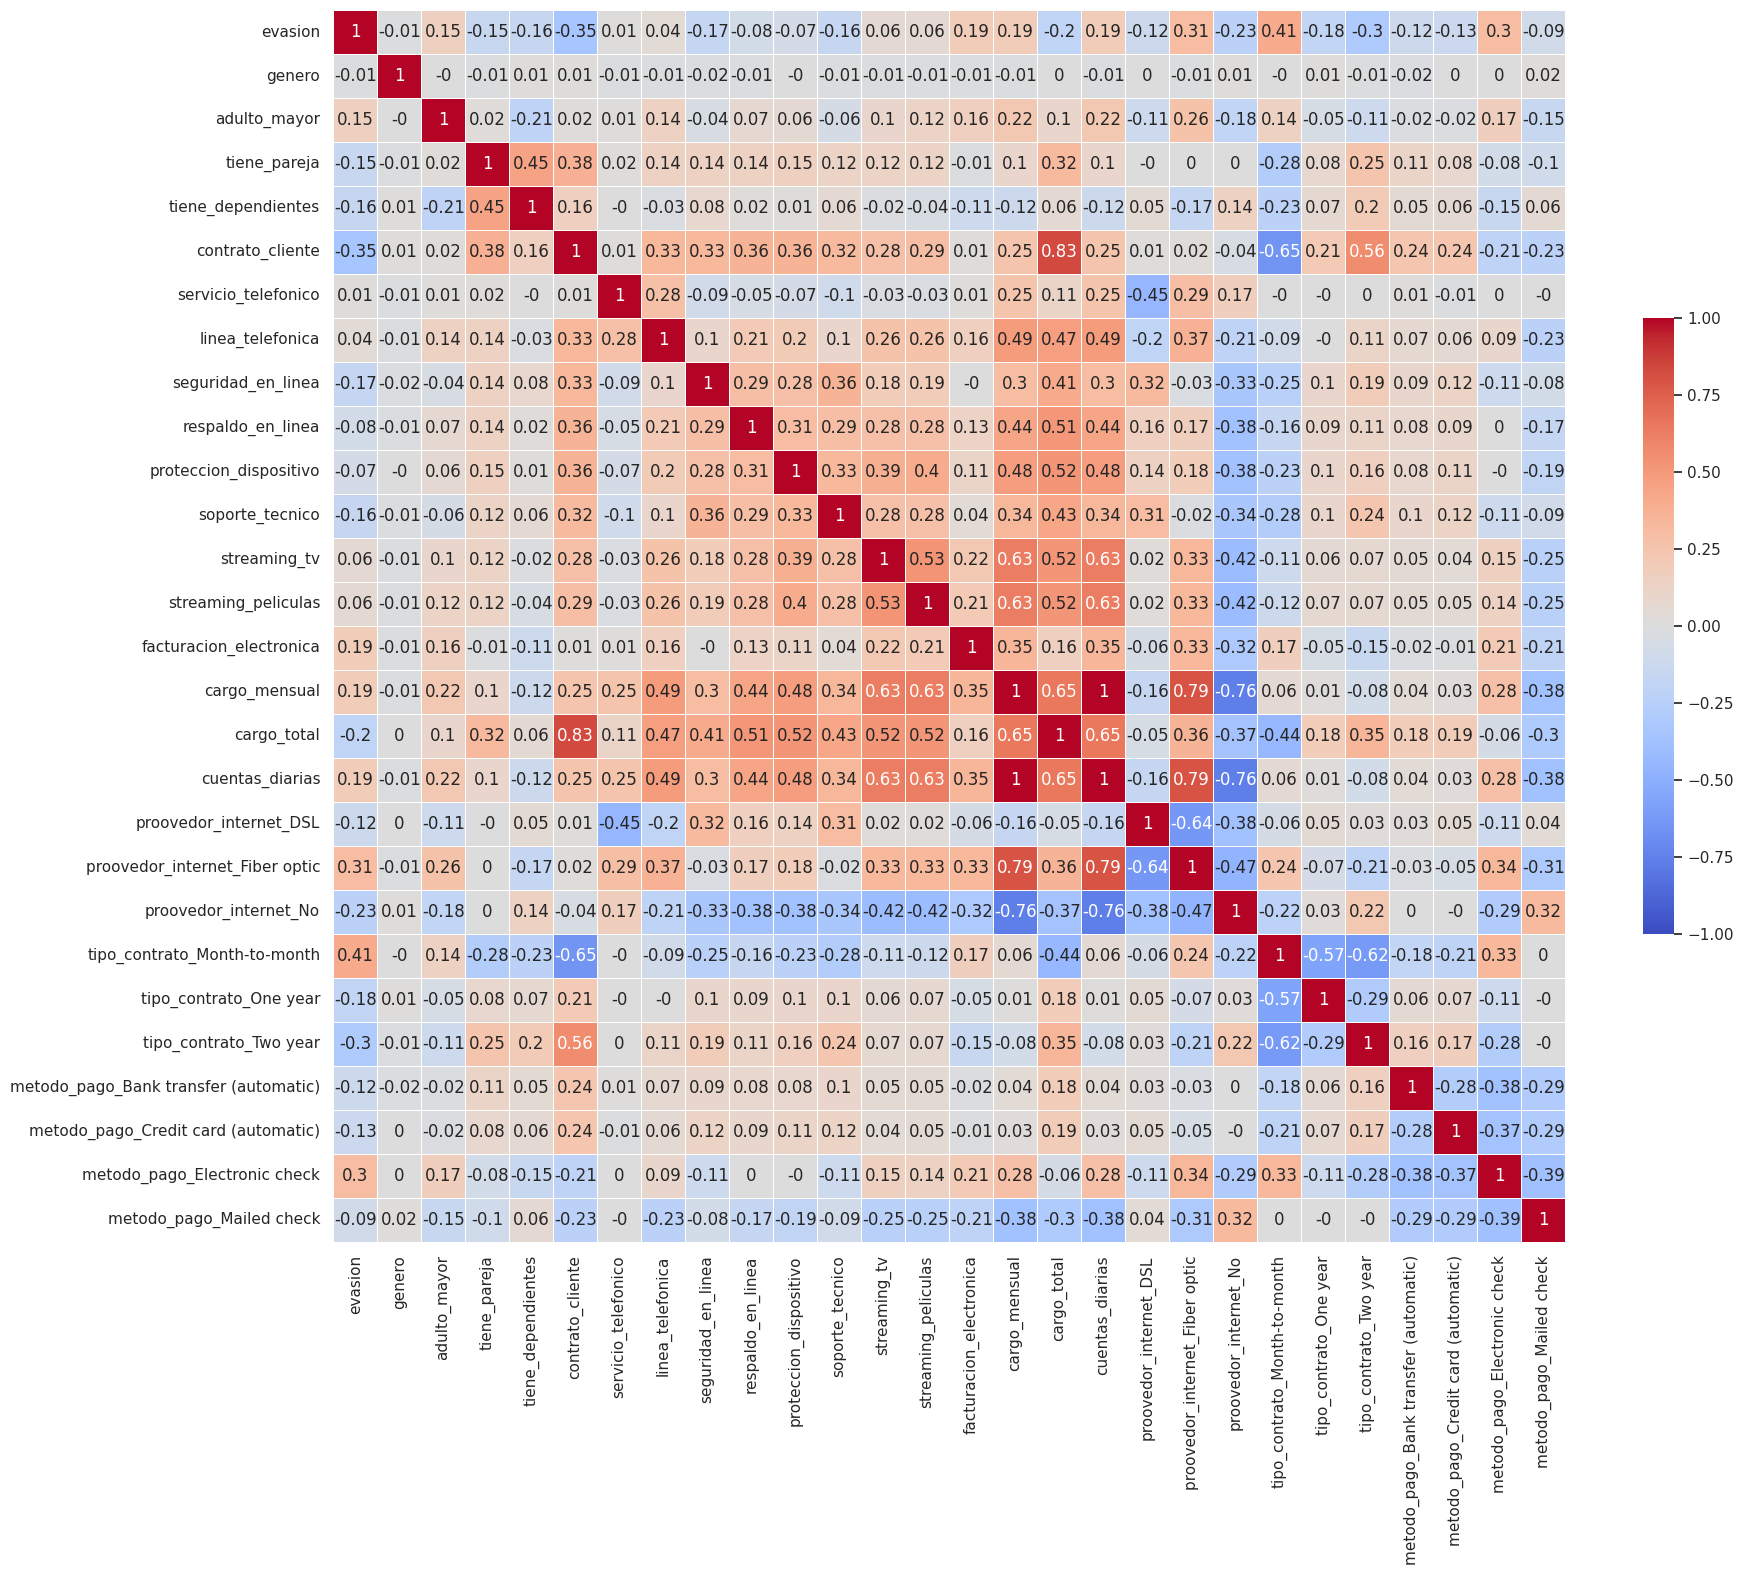

In [767]:
#Utiliza numpy, matplotlib y seaborn

fig, ax = plt.subplots(figsize=(20,16))
ax = sns.heatmap(
    np.round(corr, 2),
    vmax=1,
    vmin=-1,
    center=0,
    square=True,
    linewidths=.5,
    annot=True,
    cbar_kws={"shrink": .5},
    cmap="coolwarm"  # Aquí cambias el color
)
plt.show()

/tmp/ipython-input-1678990840.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


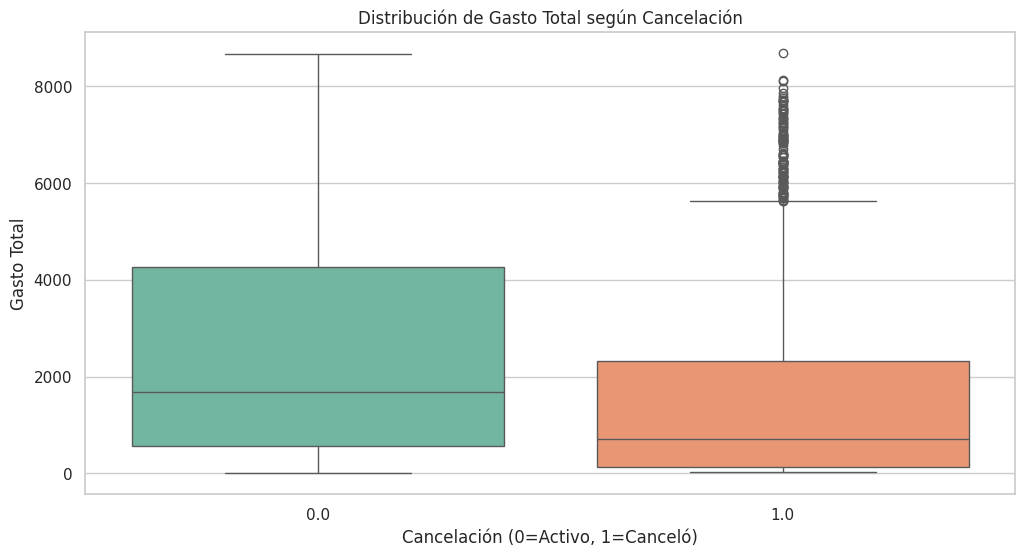

In [768]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (12,6)

# Boxplot: Gasto total vs Cancelación
plt.figure()
sns.boxplot(
    x='evasion',          # 0 = activo, 1 = canceló
    y='cargo_total',
    data=df,
    palette="Set2"
)
plt.title("Distribución de Gasto Total según Cancelación")
plt.xlabel("Cancelación (0=Activo, 1=Canceló)")
plt.ylabel("Gasto Total")
plt.show()

In [770]:

#Separar features y target
X = df_encoded.drop(columns=['evasion'])
y = df_encoded['evasion']

In [771]:
#Eliminar nan
df_clean = df.dropna(subset=['evasion'])
X = df_clean.drop('evasion', axis=1)
y = df_clean['evasion']

In [772]:
#Dividir entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)


## Creación de modelos
#### Se realiza modelo de regresion logistica

In [773]:
print(X_train.select_dtypes(include='object').columns)

Index(['proovedor_internet', 'tipo_contrato', 'metodo_pago'], dtype='object')


In [774]:
X_train = pd.get_dummies(X_train, drop_first=True)
X_test  = pd.get_dummies(X_test, drop_first=True)

# Asegúrate que ambas matrices tengan las mismas columnas
X_test = X_test.reindex(columns=X_train.columns, fill_value=0)

###Este modelo se utiliza para aprovechar el escalamiento realizado anteriormente

Regresión Logística
Exactitud: 0.7946048272598202
ROC AUC: 0.8389795468327913
Matriz de Confusión:
 [[1379  173]
 [ 261  300]]
              precision    recall  f1-score   support

         0.0       0.84      0.89      0.86      1552
         1.0       0.63      0.53      0.58       561

    accuracy                           0.79      2113
   macro avg       0.74      0.71      0.72      2113
weighted avg       0.79      0.79      0.79      2113



/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


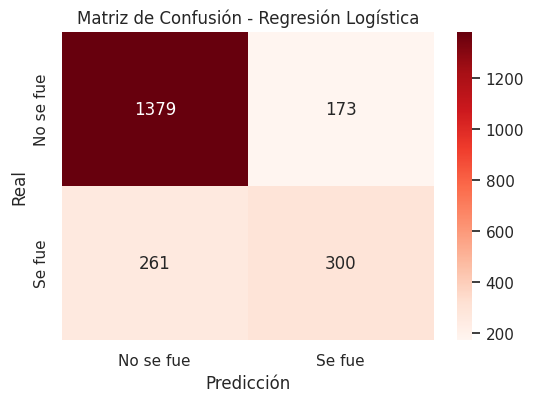

In [775]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve, precision_score, recall_score, f1_score
# Instanciar y entrenar
lr = LogisticRegression(random_state=42)
lr.fit(X_train, y_train)

# Predicciones
y_pred_lr = lr.predict(X_test)
y_prob_lr = lr.predict_proba(X_test)[:, 1]

# Obtener coeficientes
coeficientes = lr.coef_[0]
intercepto = lr.intercept_[0]

# Evaluación
print("Regresión Logística")
print("Exactitud:", accuracy_score(y_test, y_pred_lr))
print("ROC AUC:", roc_auc_score(y_test, y_prob_lr))
print("Matriz de Confusión:\n", confusion_matrix(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))


# Crear matriz de confusión
cm = confusion_matrix(y_test, y_pred_lr)

# Visualizar con heatmap
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Reds",
            xticklabels=["No se fue", "Se fue"],
            yticklabels=["No se fue", "Se fue"])
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.title("Matriz de Confusión - Regresión Logística")
plt.show()

## Modelo Random Forest

Random Forest
Exactitud: 0.7860861334595362
ROC AUC: 0.8239756188323502
Matriz de Confusión:
 [[1387  165]
 [ 287  274]]
              precision    recall  f1-score   support

         0.0       0.83      0.89      0.86      1552
         1.0       0.62      0.49      0.55       561

    accuracy                           0.79      2113
   macro avg       0.73      0.69      0.70      2113
weighted avg       0.77      0.79      0.78      2113



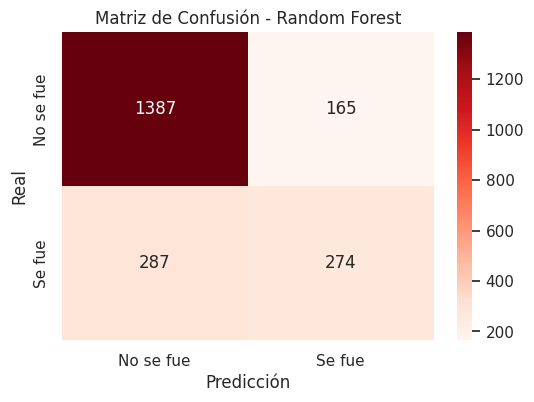

In [776]:
# Instanciar y entrenar
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

# Predicciones
y_pred_rf = rf.predict(X_test)
y_prob_rf = rf.predict_proba(X_test)[:, 1]

# Evaluación
print("Random Forest")
print("Exactitud:", accuracy_score(y_test, y_pred_rf))
print("ROC AUC:", roc_auc_score(y_test, y_prob_rf))
print("Matriz de Confusión:\n", confusion_matrix(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))


# Crear matriz de confusión
cm = confusion_matrix(y_test, y_pred_rf)

# Visualizar con heatmap
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Reds",
            xticklabels=["No se fue", "Se fue"],
            yticklabels=["No se fue", "Se fue"])
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.title("Matriz de Confusión - Random Forest")
plt.show()

In [777]:
coef_df = pd.DataFrame({"Variable": X_train.columns, "Coeficiente": coeficientes})
coef_df = coef_df.sort_values(by="Coeficiente", ascending=False)
coef_df

,Variable,Coeficiente
13,facturacion_electronica,0.588444
17,proovedor_internet_Fiber optic,0.495471
22,metodo_pago_Electronic check,0.274243
1,adulto_mayor,0.251669
6,linea_telefonica,0.211621
11,streaming_tv,0.077973
2,tiene_pareja,0.072693
12,streaming_peliculas,0.023428
14,cargo_mensual,0.010090
0,genero,0.002533


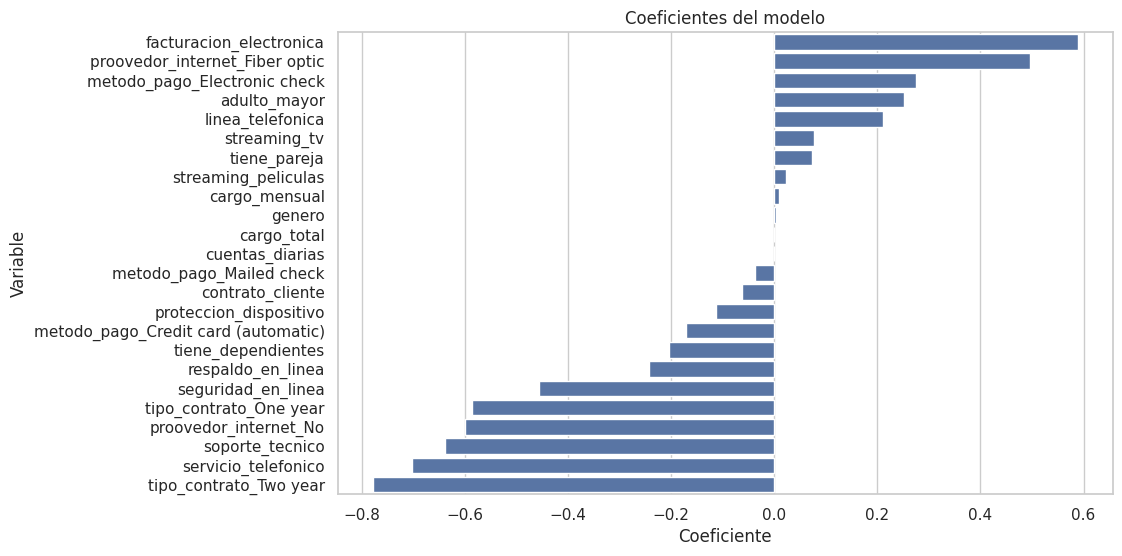

In [778]:

#graficar los coef_df
plt.figure(figsize=(10, 6))
sns.barplot(x="Coeficiente", y="Variable", data=coef_df)
plt.title("Coeficientes del modelo")
plt.show()

#Informe

# Comparación de Modelos

* Regresión Logística

  1. Accuracy: 0.79
  2. Clase 0 (no se fue): Precisión 0.84, Recall 0.89, F1 = 0.86
  3. Clase 1 (sí se fue): Precisión 0.63, Recall 0.53, F1 = 0.58
  4. Balance: Tiende a predecir mejor la clase mayoritaria (0.0).

* Random Forest

  1. Accuracy: 0.79 (igual que la regresión)
  2. Clase 0 (no se fue): Precisión 0.83, Recall 0.89, F1 = 0.86
  3. Clase 1 (sí se fue): Precisión 0.62, Recall 0.49, F1 = 0.55
  4. Balance: Similar a la regresión, pero con menor recall en la clase 1 (pierde más clientes reales).

* Análisis Crítico

* Mejor desempeño general:
Ambos modelos tienen la misma exactitud (0.79). Sin embargo, la regresión logística logra un mejor recall y F1 en la clase 1 (clientes que se dan de baja) → esto es crucial en churn prediction, porque nos interesa más detectar a los clientes que se marchan que a los que se quedan.

Se recomienda utilizar Regresión Logistica.

* Overfitting / Underfitting:
El Random Forest no mostró ventajas frente a la regresión logística, lo que indica una posible subutilización de su capacidad debido a parámetros por defecto. No presenta signos claros de overfitting, pero sí requiere ajuste de hiperparámetros para mejorar la detección de la clase minoritaria.

* Regresión Logística:
La regresión logística evidenció un desempeño estable y sin overfitting, aunque con cierto underfitting reflejado en un recall limitado (0.53) para la clase positiva. Esto sugiere la necesidad de ajustar la regularización o incorporar interacciones que capten relaciones más complejas.

# Analisis de Importancia de las variables

Análisis de variables relevantes

Regresión Logística: los coeficientes muestran la dirección (+/–) y magnitud del efecto de cada variable sobre la cancelación. Esto permite interpretar qué factores aumentan o reducen el riesgo de abandono. En este caso las variables que influyen en la cancelacion son el tipo de facturacion y el servicio de internet.

Random Forest: utiliza la importancia de variables, medida por su contribución a la reducción de impureza en los árboles. Identifica cuáles variables son más decisivas, aunque no indica si aumentan o disminuyen el riesgo. En este caso se evaluó mas que todo la capacidad de prediccion del modelo, determinando que este se concentra mucho mas en los clientes que no cancelan, que pierda la capacidad de evaluar a los que continuan. Evidenciado en la diferencia de recall entre ambos modelos 0.49 vs 0.53 del modelo de regresion logistica.

Comparación: la regresión logística ofrece interpretabilidad causal, mientras que el Random Forest resalta la relevancia jerárquica de los predictores. Ambos métodos son complementarios: uno explica el cómo, el otro el qué tan importante.

# Factores de Cancelación y Estrategias de Retención

* Factores más influyentes

Según la Regresión Logística:

  1. Metodo de pago: Facturacion electronica influye positivamente en la cancelacion del contrato.

  2. Servicio de internet: El proovedor de internet está relacionado con el uso de fibra optica, el cual supone una mayor velocidad de internet, sin embargo parece ser que esto no ocurre dando una insatisfaccion del cliente.

* Comparación de modelos

La Regresión Logística logra un balance aceptable, detectando una mayor proporción de clientes en riesgo.

El Random Forest, aunque robusto, se concentra demasiado en los clientes que no cancelan, perdiendo capacidad para detectar a quienes sí lo hacen.

Estrategias de retención propuestas

  * Fortalecer la atención al cliente, reduciendo tiempos de respuesta y mejorando la calidad de soporte, esto acompañado de la revisión del producto ofrecido.

Se recomienda evaluar la colinealidad y el balanceo de datos para mejorar la interpretación de los modelos y la capacidad predictiva en la cancelación de clientes